In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
dataset = pd.read_csv('Employee_Salary_Data-22.csv')

features=dataset.iloc[:,1:4].values

given_salary=dataset.iloc[:,-1].values

index = list(dataset['Index'])

In [8]:
from sklearn.model_selection import train_test_split
features_train, features_test, given_salary_train, given_salary_test = train_test_split(features, given_salary, test_size=0.3, random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(features_train, given_salary_train)
predictions = model.predict(features_test)
linear_predicted_salary = model.predict(features)
linear_predicted_salary

array([ 41043.333923  ,  42651.19578141,  44492.3196672 ,  49250.63739992,
        51091.76128571,  57457.94087684,  58456.25682886,  60219.62670553,
        60219.62670553,  64977.94443825,  66741.31431491,  67661.87625781,
        67273.10621217,  68271.42216419,  71875.91592664,  75869.17973473,
        77088.2715475 ,  93402.0543702 ,  89953.068626  ,  78307.36336028,
        83519.71898114,  98160.37210293,  83740.49484189,  90949.48236679,
        91560.93048441,  93944.43022285, 101153.41774775, 103370.82551255,
       107584.86518139, 109129.36140853,  57457.94087684, 109802.27294618,
       116571.61096081, 114016.31261502, 113887.67914125, 114237.08847577,
       120447.76004865, 107365.99153187, 121666.85186143, 109129.36140853])

In [10]:
pf = PolynomialFeatures()

model.fit(pf.fit_transform(features), given_salary)

polynomial_predicted_salary = model.predict(pf.fit_transform(features))

polynomial_predicted_salary

array([ 39666.42800198,  40202.44018476,  43620.01106147,  51712.95359002,
        53873.22211657,  59810.95979721,  59876.15646345,  61422.15308432,
        61422.15308432,  60434.84899283,  61584.015314  ,  61444.00993859,
        67216.76592207,  66408.36293647,  67614.64560028,  59340.15440087,
        72243.94566309,  87575.27293121,  76295.98122928,  80574.63374967,
        85485.26788954,  95940.33042936,  88619.41111298,  95376.76091453,
        82812.67925505,  94970.19495138,  97310.62794893, 104736.97685579,
       109728.12584254, 115264.88773486,  59810.95979721, 114090.06674922,
       119121.61477239, 118247.30245396, 114549.69861296, 115518.44442099,
       122868.15778317, 110828.64730002, 118143.84337778, 115264.88773486])

In [11]:
print('linear regression mean squared error =', mean_squared_error(given_salary, linear_predicted_salary))
print('linear regression accuracy score =', round(r2_score(given_salary, linear_predicted_salary), 2))
print('polynomial regression mean squared error =', mean_squared_error(given_salary, polynomial_predicted_salary))
print('polynomial regression accuracy score =', round(r2_score(given_salary, polynomial_predicted_salary), 2))


linear regression mean squared error = 139738632.1620044
linear regression accuracy score = 0.82
polynomial regression mean squared error = 115496722.06696737
polynomial regression accuracy score = 0.85


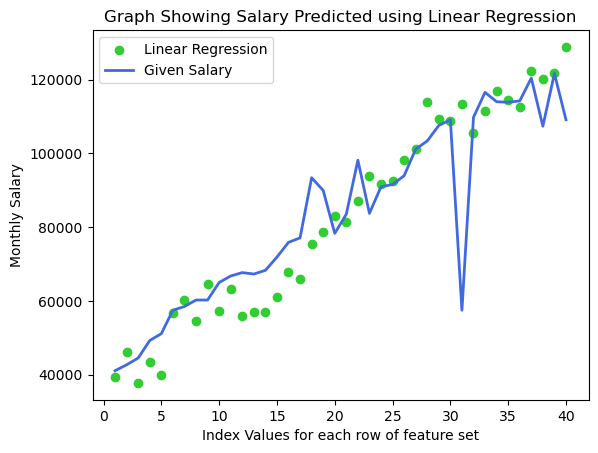

In [12]:
plt.title('Graph Showing Salary Predicted using Linear Regression')
plt.scatter(index, given_salary, color='limegreen')
plt.plot(index, linear_predicted_salary, color='royalblue', linewidth=2) 
plt.legend(['Linear Regression', 'Given Salary'], loc= 'upper left' )
plt.xlabel('Index Values for each row of feature set')
plt.ylabel('Monthly Salary')
plt.show()

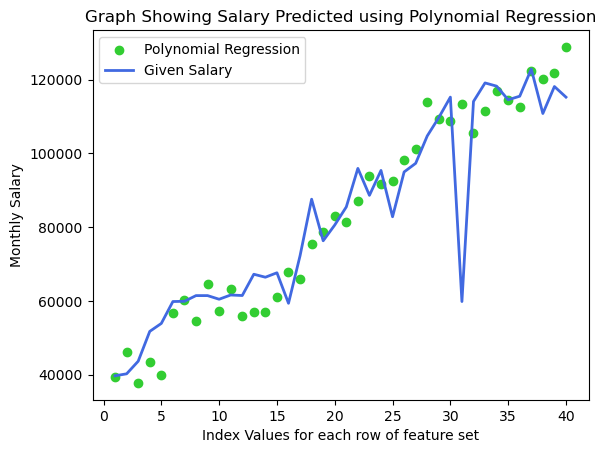

In [13]:
plt.title('Graph Showing Salary Predicted using Polynomial Regression')
plt.scatter(index, given_salary, color='limegreen')
plt.plot(index, polynomial_predicted_salary, color='royalblue', linewidth=2)
plt.legend(['Polynomial Regression', 'Given Salary'], loc='upper left')
plt.xlabel('Index Values for each row of feature set')
plt.ylabel('Monthly Salary')
plt.show()

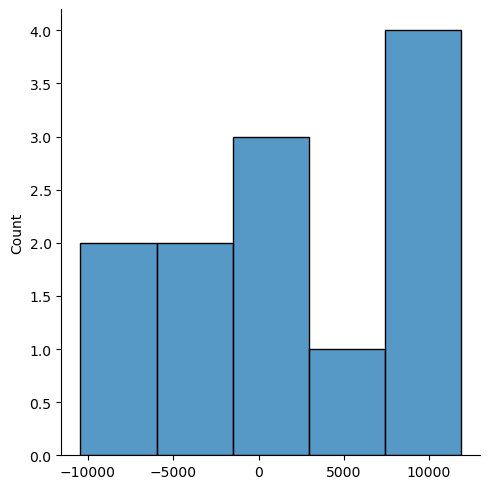

In [69]:
import seaborn as sns
sns.displot(predictions-given_salary_test)
